In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Part A. Binary Logistic Regression from Scratch

Reading, preprocessing and cleaning data

In [2]:
heart_disease = fetch_ucirepo(id = 45)
X = heart_disease.data.features # features
Y = heart_disease.data.targets # heart disease diagnosis
Y['num'] = (Y['num'] != 0)*1

C:\Users\aula02\AppData\Local\Temp\ipykernel_9704\2008545978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['num'] = (Y['num'] != 0)*1


In [3]:
display(X.head(5))
display(X.info())
display(X.describe())
display(heart_disease.variables)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [4]:
X_cat = X[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]
X_num = X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

Encode categorical features

In [5]:
enc = OneHotEncoder(drop='first', sparse_output=False)

In [6]:
X_enc = enc.fit_transform(X_cat)
column_names = enc.get_feature_names_out(X_cat.columns)
X_enc = pd.DataFrame(X_enc, columns=column_names, index=X_cat.index)

Standardize numeric features

In [7]:
for cat in X_num.columns:
    X_num[cat] = (X_num[cat] - min(X_num[cat])) / (max(X_num[cat]) - min(X_num[cat]))

C:\Users\aula02\AppData\Local\Temp\ipykernel_9704\141412892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[cat] = (X_num[cat] - min(X_num[cat])) / (max(X_num[cat]) - min(X_num[cat]))
C:\Users\aula02\AppData\Local\Temp\ipykernel_9704\141412892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[cat] = (X_num[cat] - min(X_num[cat])) / (max(X_num[cat]) - min(X_num[cat]))
C:\Users\aula02\AppData\Local\Temp\ipykernel_9704\141412892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a 

In [8]:
X_final = pd.concat([X_cat, X_num], axis=1)

The missings are so few that can be just deleted

In [9]:
pd.concat([X_final, Y], axis=1)

,sex,cp,fbs,restecg,exang,slope,thal,age,trestbps,chol,thalach,oldpeak,ca,num
0,1,1,1,2,0,3,6.0,0.708333,0.481132,0.244292,0.603053,0.370968,0.000000,0
1,1,4,0,2,1,2,3.0,0.791667,0.622642,0.365297,0.282443,0.241935,1.000000,1
2,1,4,0,2,1,2,7.0,0.791667,0.245283,0.235160,0.442748,0.419355,0.666667,1
3,1,3,0,0,0,3,3.0,0.166667,0.339623,0.283105,0.885496,0.564516,0.000000,0
4,0,2,0,2,0,1,3.0,0.250000,0.339623,0.178082,0.770992,0.225806,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,0,0,0,2,7.0,0.333333,0.150943,0.315068,0.465649,0.193548,0.000000,1
299,1,4,1,0,0,2,7.0,0.812500,0.471698,0.152968,0.534351,0.548387,0.666667,1
300,1,4,0,0,1,2,7.0,0.583333,0.339623,0.011416,0.335878,0.193548,0.333333,1
301,0,2,0,2,0,2,3.0,0.583333,0.339623,0.251142,0.786260,0.000000,0.333333,1


In [10]:
df = pd.concat([X_final, Y], axis=1)
df = df.dropna()

In [11]:
X_final = df[[c for c in df.columns if c!= 'num']]
Y_final = df[['num']]

Creating the optimization algorithm

In [12]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def f(X,theta):
    f = sigmoid(X.dot(theta))
    return f

def log_likelihood(X,Y,theta):
    return (Y*np.log(f(X,theta) + 1e-6 ) + (1-Y)*np.log(1-f(X,theta) + 1e-6)).mean()

def loglik_gradient(theta, X, Y):
    return X.T @ (f(X, theta)-Y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_final.to_numpy(), Y_final['num'], test_size=0.3, random_state=42)

In [14]:
threshold = 1e-5
step_size = 5e-4

theta, theta_prev = np.zeros((13,)) , np.ones((13,))
opt_pts = [theta]
opt_grads = []
iter = 0

max_iter = 2000000

I0 = []
LL0 = []

while np.linalg.norm(theta - theta_prev) > threshold:
    LL = log_likelihood(X_train, y_train, theta)
    if iter % 500 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, LL))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    I0.append(iter)
    LL0.append(LL)
    iter += 1
    if iter == max_iter:
        print('Max iter reached')
        break

print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(X_train, y_train, theta)))

Iteration 0. Log-likelihood: -0.693145
Iteration 500. Log-likelihood: -0.449126
Iteration 1000. Log-likelihood: -0.418681
Iteration 1500. Log-likelihood: -0.407213
Iteration 2000. Log-likelihood: -0.401189
Iteration 2500. Log-likelihood: -0.397381
Iteration 3000. Log-likelihood: -0.394704
Iteration 3500. Log-likelihood: -0.392702
Iteration 4000. Log-likelihood: -0.391149
Iteration 4500. Log-likelihood: -0.389916
Iteration 5000. Log-likelihood: -0.388920
Iteration 5500. Log-likelihood: -0.388107
Iteration 6000. Log-likelihood: -0.387435
Iteration 6500. Log-likelihood: -0.386876
Iteration 7000. Log-likelihood: -0.386407
Iteration 7500. Log-likelihood: -0.386011
Iteration 8000. Log-likelihood: -0.385675
Iteration 8500. Log-likelihood: -0.385389
Iteration 9000. Log-likelihood: -0.385143
Iteration 9500. Log-likelihood: -0.384932
Iteration 10000. Log-likelihood: -0.384749
Iteration 10500. Log-likelihood: -0.384591
Iteration 11000. Log-likelihood: -0.384454
Iteration 11500. Log-likelihood: -0

In [15]:
y_test_prob = f(X_test, theta)
y_test_pred = (y_test_prob >= 0.5) * 1

In [16]:
threshold = 1e-5
step_size = 8e-5

theta, theta_prev = np.zeros((13,)) , np.ones((13,))
opt_pts = [theta]
opt_grads = []
iter = 0

max_iter = 2000000

I1 = []
LL1 = []

while np.linalg.norm(theta - theta_prev) > threshold:
    LL = log_likelihood(X_train, y_train, theta)
    if iter % 500 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, LL))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    I1.append(iter)
    LL1.append(LL)
    iter += 1
    if iter == max_iter:
        print('Max iter reached')
        break

print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(X_train, y_train, theta)))

Iteration 0. Log-likelihood: -0.693145
Iteration 500. Log-likelihood: -0.573220
Iteration 1000. Log-likelihood: -0.525589
Iteration 1500. Log-likelihood: -0.496130
Iteration 2000. Log-likelihood: -0.476284
Iteration 2500. Log-likelihood: -0.462071
Iteration 3000. Log-likelihood: -0.451426
Iteration 3500. Log-likelihood: -0.443180
Iteration 4000. Log-likelihood: -0.436624
Iteration 4500. Log-likelihood: -0.431302
Iteration 5000. Log-likelihood: -0.426906
Iteration 5500. Log-likelihood: -0.423221
Iteration 6000. Log-likelihood: -0.420092
Iteration 6500. Log-likelihood: -0.417406
Iteration 7000. Log-likelihood: -0.415076
Iteration 7500. Log-likelihood: -0.413037
Iteration 8000. Log-likelihood: -0.411237
Iteration 8500. Log-likelihood: -0.409637
Iteration 9000. Log-likelihood: -0.408203
Iteration 9500. Log-likelihood: -0.406912
Iteration 10000. Log-likelihood: -0.405741
Iteration 10500. Log-likelihood: -0.404673
Iteration 11000. Log-likelihood: -0.403696
Iteration 11500. Log-likelihood: -0

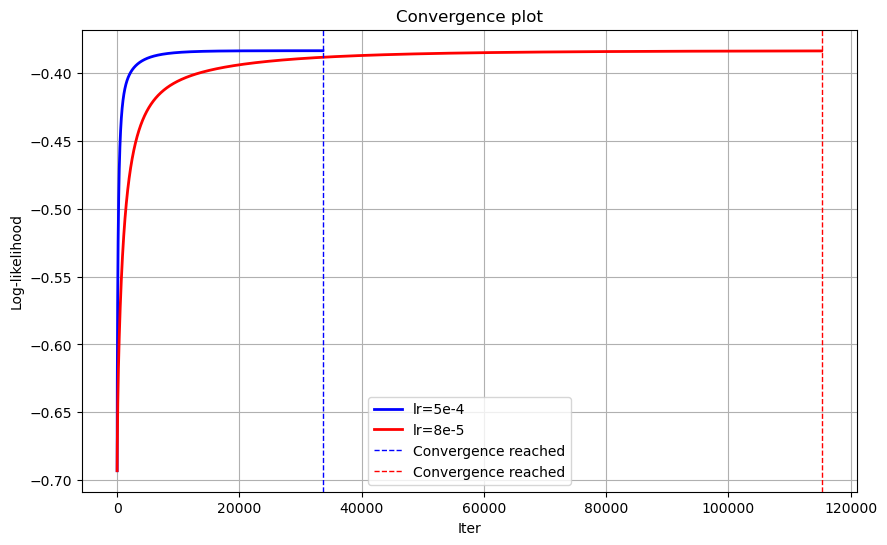

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(I0, LL0, label='lr=5e-4', color='blue', linewidth=2)
plt.plot(I1, LL1, label='lr=8e-5', color='red', linewidth=2)
plt.axvline(x=33658, color='blue', linestyle='--', linewidth=1, label=f'Convergence reached')
plt.axvline(x=115249, color='red', linestyle='--', linewidth=1, label=f'Convergence reached')
plt.title('Convergence plot')
plt.xlabel('Iter')
plt.ylabel('Log-likelihood')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
lr = LogisticRegression(fit_intercept=True, random_state=1234)
lr.fit(X_train, y_train)
y_test_pred_sk = lr.predict(X_test)

Evaluation metrics

In [19]:
def find_conf_matrix_values(y_true,y_pred):
  TP = sum((y_true == 1) & (y_pred == 1))
  FN = sum((y_true == 0) & (y_pred == 1))
  FP = sum((y_true == 1) & (y_pred == 0))
  TN = sum((y_true == 0) & (y_pred == 0))
  return TP,FN,FP,TN

def my_accuracy_score(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return (TP + TN)/(TP + FN + FP + TN)

def my_precision_score(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return TP / (TP + FP)

def my_recall_score(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return TP / (TP + FN)

def my_f1_score(y_true, y_pred):
  recall = my_recall_score(y_true,y_pred)
  precision = my_precision_score(y_true,y_pred)
  return 2 * (precision * recall) / (precision + recall)

In [20]:
print('Results with Gradient Descent:\n')
print('Accuracy: %.6f' % (my_accuracy_score(y_test,y_test_pred)))
print('Precision: %.6f' % (my_precision_score(y_test,y_test_pred)))
print('Recall: %.6f' % my_recall_score(y_test,y_test_pred))
print('F1-Score: %.6f' % my_f1_score(y_test,y_test_pred))

Results with Gradient Descent:

Accuracy: 0.866667
Precision: 0.829268
Recall: 0.871795
F1-Score: 0.850000


In [21]:
print('Results with Sk-Learn:\n')
print('Accuracy: %.6f' % (my_accuracy_score(y_test,y_test_pred_sk)))
print('Precision: %.6f' % (my_precision_score(y_test,y_test_pred_sk)))
print('Recall: %.6f' % my_recall_score(y_test,y_test_pred_sk))
print('F1-Score: %.6f' % my_f1_score(y_test,y_test_pred_sk))

Results with Sk-Learn:

Accuracy: 0.888889
Precision: 0.853659
Recall: 0.897436
F1-Score: 0.875000


Despite the more time of computing, the results are better with sk-learn algorithm. This difference probably is result of the use of a better optimization strategy.

## Part B. Multiclass Logistic Regression via One-vs-All (OvA)

**4. Dataset Use the Wine dataset (from sklearn.datasets import load_wine).**

In [ ]:
# There are 3 wine cultivars (classes) with 13 chemical features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

print(f"Shape of X: {X.shape}")
print(f"Unique classes: {np.unique(y)}")

Shape of X: (178, 13)
Unique classes: [0 1 2]


In [ ]:
# Standardize all features

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Add intercept column

In [4]:
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

In [6]:
# Split. Use train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=20, stratify=y)

5. **OvA Implementation**


In [ ]:
# Build **three binary classifiers**, each distinguishing one class vs. all others.
# Use your binary logistic regression optimizer from Part A.

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def f(X, theta):
    return sigmoid(X.dot(theta))

def log_likelihood(theta, X, y):
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

def loglik_gradient(theta, X, y):
    return np.mean((f(X, theta) - y) * X.T, axis=1)

def gradient_descent(X, y, lr=0.01, epochs=10000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        y_pred = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (y_pred - y)
        theta -= lr * gradient
    return theta

In [8]:
classes = np.unique(y_train)
theta_all = {}

print("Training OvA classifiers...")
for c in classes:
    y_binary = (y_train == c).astype(int)
    theta_c = gradient_descent(X_train, y_binary)
    theta_all[c] = theta_c
    print(f"Trained class {c}")

Training OvA classifiers...
Trained class 0
Trained class 1
Trained class 2


   * For prediction:

     * Compute probabilities from each classifier.
     * Assign each observation to the class with the highest predicted probability

In [9]:
#Function
def predict_ova(X, theta_all):
    probs = np.zeros((X.shape[0], len(theta_all)))
    for c, theta in theta_all.items():
        probs[:, c] = f(X, theta)
    return np.argmax(probs, axis=1), probs

# Predictions
y_pred_train, _ = predict_ova(X_train, theta_all)
y_pred_test, _ = predict_ova(X_test, theta_all)

   * Report confusion matrix and accuracy.

Test Accuracy:  0.9630

Confusion Matrix:


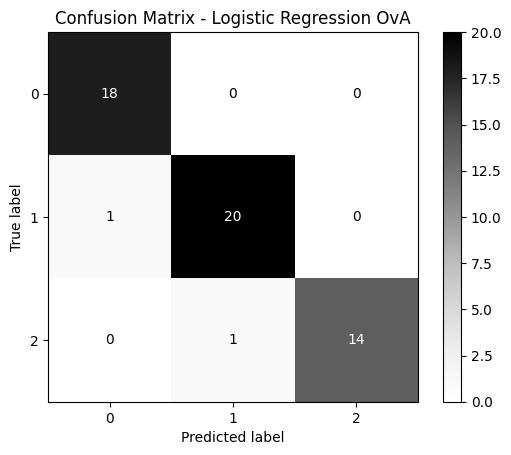

In [14]:
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

#print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1, 2])
disp.plot(cmap='Greys', values_format='d')
plt.title("Confusion Matrix - Logistic Regression OvA")
plt.show()

Comment:
The OvA model achieved an accuracy of 96.30%, which demonstrates good effectiveness in distinguishing the three wine classes.
The confusion matrix shows that almost all observations were correctly classified, with only a small error in class 1.
In summary, this model shows good and accurate performance in multiclass prediction.

6. **Comparison**
   * Fit `LogisticRegression(multi_class="ovr")` from sklearn.
   * Compare coefficients and accuracy to your own implementation.
  

In [13]:
#Using Sklearn
sk_model = LogisticRegression(multi_class="ovr", max_iter=10000, random_state=20)
sk_model.fit(X_train[:, 1:], y_train)
y_pred_sk = sk_model.predict(X_test[:, 1:])

sk_acc = accuracy_score(y_test, y_pred_sk)

print("\nComparison with sklearn:")
print(f"Custom OvA Logistic Regression Accuracy: {test_acc:.4f}")
print(f"sklearn LogisticRegression(ovr) Accuracy: {sk_acc:.4f}")

# Compare coefficients
for c in classes:
    print(f"\nClass {c}")
    print(f"  Our coefficients: {theta_all[c][:5]}")
    print(f"  Sklearn coef:     {sk_model.coef_[c][:5]}")


Comparison with sklearn:
Custom OvA Logistic Regression Accuracy: 0.9630
sklearn LogisticRegression(ovr) Accuracy: 0.9630

Class 0
  Our coefficients: [-1.67207354  1.43241178  0.21855973  1.04948935 -1.23933799]
  Sklearn coef:     [ 1.11974665  0.13989642  0.81808585 -0.95956191  0.14618081]

Class 1
  Our coefficients: [-1.17341953 -1.83950597 -1.04007029 -1.24877814  0.58942787]
  Sklearn coef:     [-1.32630445 -0.77804247 -0.91608494  0.4281271  -0.06734354]

Class 2
  Our coefficients: [-2.82972921  0.47496192  0.70681189  0.56169167  0.46883102]
  Sklearn coef:     [0.53857279 0.75034606 0.59094583 0.44771088 0.16463422]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Comment:

It is found that the accuracy value of 0.9630 is the same under both models, whether using OvA or LogisticRegression from Scikit-learn. However, it is observed that the coefficients are different.

# Part C · Multinomial (Softmax) Logistic Regression — From Scratch

## 7. Theory

### Derive the gradient of the log-likelihood function for muticlass classification (check the notebook for session 4)

### Derivación del Gradiente de la Log-Verosimilitud en Softmax Regression

Recordemos que la log-verosimilitud para un conjunto de datos 
$\mathcal{D} = \{(x^{(i)}, y^{(i)})\}_{i=1}^n$ es

$$
\ell(\theta)
= \sum_{i=1}^n \theta^\top_{y^{(i)}} x^{(i)}
- \sum_{i=1}^n \log \left( \sum_{j=1}^K \exp(\theta_j^\top x^{(i)}) \right).
$$

donde $\theta_l \in \mathbb{R}^d$ es el vector de parámetros para la clase $l$.

---

### 1. Derivada del primer término

Sea

$$
T_1(\theta) = \sum_{i=1}^n \theta^\top_{y^{(i)}} x^{(i)}.
$$

Al derivar respecto a $\theta_l$, sólo aportan los ejemplos donde $y^{(i)} = l$:

$$
\frac{\partial T_1}{\partial \theta_l}
= \sum_{i=1}^n \mathbf{1}\{y^{(i)}=l\}\, x^{(i)}.
$$

---

### 2. Derivada del segundo término

Sea

$$
T_2(\theta) = \sum_{i=1}^n \log \left( \sum_{j=1}^K \exp(\theta_j^\top x^{(i)}) \right).
$$

Usando la regla de la cadena y notando que 
$\frac{\partial}{\partial \theta_l}(\theta_l^\top x^{(i)}) = x^{(i)}$, tenemos

$$
\frac{\partial}{\partial \theta_l}
\log \left( \sum_{j=1}^K \exp(\theta_j^\top x^{(i)}) \right)
= \frac{\exp(\theta_l^\top x^{(i)})}{\sum_{j} \exp(\theta_j^\top x^{(i)})}\, x^{(i)}
= \sigma(z^{(i)})_l\, x^{(i)},
$$

donde $\sigma(z^{(i)})_l = p_\theta(y=l\mid x^{(i)})$.  

Por lo tanto,

$$
\frac{\partial T_2}{\partial \theta_l}
= \sum_{i=1}^n \sigma(z^{(i)})_l\, x^{(i)}.
$$

---

### 3. Gradiente total

Como $\ell(\theta) = T_1(\theta) - T_2(\theta)$, se tiene

$$
\boxed{
\frac{\partial \ell(\theta)}{\partial \theta_l}
= \sum_{i=1}^n \Big( \mathbf{1}\{y^{(i)}=l\} - \sigma(z^{(i)})_l \Big)\, x^{(i)}
}.
$$


## 8. Implementation

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [26]:
def softmax(z):
    # Estabilidad numérica
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_log_likelihood(X, y, W):
    n = X.shape[0]
    scores = X @ W
    probs = softmax(scores)
    log_likelihood = np.sum(np.log(probs[np.arange(n), y]))
    return log_likelihood

def gradient_descent(X, y, num_classes, lr=0.1, epochs=5000, tol=1e-6):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))
    prev_ll = -np.inf
    ll_history = []

    for epoch in range(epochs):
        scores = X @ W
        probs = softmax(scores)
        y_onehot = np.zeros_like(probs)
        y_onehot[np.arange(n_samples), y] = 1
        grad = X.T @ (y_onehot - probs)
        W += lr * grad / n_samples

        ll = compute_log_likelihood(X, y, W)
        ll_history.append(ll)

        if np.abs(ll - prev_ll) < tol:
            print(f'Convergencia en epoch {epoch}')
            break
        prev_ll = ll

    return W, ll_history

def predict(X, W):
    scores = X @ W
    probs = softmax(scores)
    return np.argmax(probs, axis=1)

In [27]:
data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

num_classes = len(np.unique(y))
num_features = X_train.shape[1]

# Entrenar modelo con descenso por gradiente
W, ll_history = gradient_descent(X_train, y_train, num_classes, lr=0.1, epochs=10000)

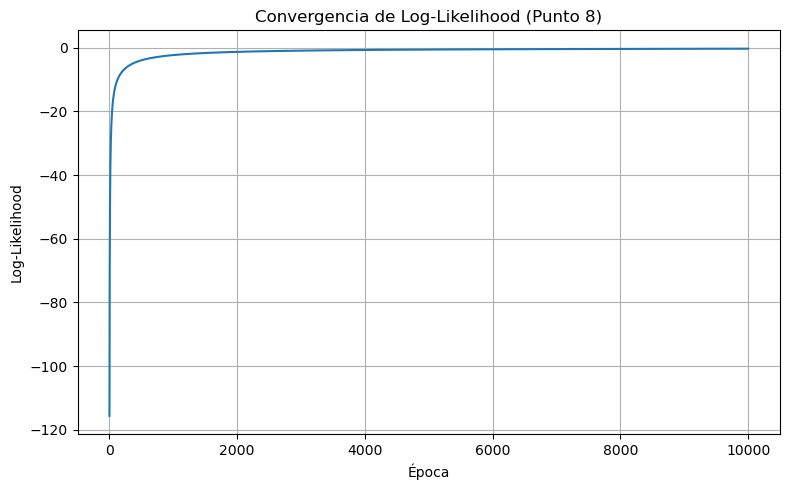

In [28]:
# Graficar convergencia log-likelihood
plt.figure(figsize=(8, 5))
plt.plot(ll_history)
plt.xlabel('Época')
plt.ylabel('Log-Likelihood')
plt.title('Convergencia de Log-Likelihood (Punto 8)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Evaluation

In [29]:
# Evaluar en test
y_pred_test = predict(X_test, W)
acc = accuracy_score(y_test, y_pred_test)
print("=== Punto 8: Evaluación modelo desde cero ===")
print(f"Accuracy: {acc:.4f}")

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average=None)
cm = confusion_matrix(y_test, y_pred_test)

=== Punto 8: Evaluación modelo desde cero ===
Accuracy: 0.9815


In [30]:
# Comparar con LogisticRegression

print("\nMétricas por clase (modelo propio):")
for i, (p, r) in enumerate(zip(precision, recall)):
    print(f"Clase {i}: Precision={p:.4f}, Recall={r:.4f}")
print("\nMatriz de confusión (modelo propio):")
print(cm)

clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10000)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn, recall_sklearn, _, _ = precision_recall_fscore_support(y_test, y_pred_sklearn, average=None)
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)

print("\nMétricas por clase (scikit-learn):")
for i, (p, r) in enumerate(zip(precision_sklearn, recall_sklearn)):
    print(f"Clase {i}: Precision={p:.4f}, Recall={r:.4f}")
print("\nMatriz de confusión (scikit-learn):")
print(cm_sklearn)

print(f"\nAccuracy (modelo propio): {acc:.4f}")
print(f"Accuracy (scikit-learn): {acc_sklearn:.4f}")


Métricas por clase (modelo propio):
Clase 0: Precision=1.0000, Recall=1.0000
Clase 1: Precision=1.0000, Recall=0.9524
Clase 2: Precision=0.9375, Recall=1.0000

Matriz de confusión (modelo propio):
[[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]

Métricas por clase (scikit-learn):
Clase 0: Precision=0.9474, Recall=1.0000
Clase 1: Precision=1.0000, Recall=0.9524
Clase 2: Precision=1.0000, Recall=1.0000

Matriz de confusión (scikit-learn):
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Accuracy (modelo propio): 0.9815
Accuracy (scikit-learn): 0.9815


c:\Users\JorgeData\.conda\envs\pytest\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
